Project Link: https://www.kaggle.com/code/lkergalipatak/speech-emotion-recognition-with-cnn/notebook#Begin-Training

In [5]:
#!pip install plotly
#!pip install tensorflow
#!pip install keras

In [6]:
# CUDA INSTALLATION
#conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

In [7]:
#!pip uninstall tensorflow version==2.7.0
#!pip install tensorflow-gpu

In [8]:
#import matplotlib
#print(matplotlib.__version__)

In [9]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
#import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow as tf
from tensorflow import keras
import keras.layers as L
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
#from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [11]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [12]:
tf.config.list_physical_devices("GPU")
tf.test.is_gpu_available()

True

In [13]:
#x = [1,2,3,4]
#y = [2,3,4,5]

#plt.plot(x,y)
#plt.show()

In [14]:
CREMA_PATH = './Crema/'
RAVDESS_PATH = './Ravdess/audio_speech_actors_01-24'
SAVE_PATH = './Savee/'
TEST_PATH = './Tess/'

In [15]:
crema=[]
for wav in os.listdir(CREMA_PATH):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',CREMA_PATH+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',CREMA_PATH+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',CREMA_PATH+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',CREMA_PATH+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',CREMA_PATH+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',CREMA_PATH+'/'+wav))
    else:
        crema.append(('unknown',CREMA_PATH+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

,Emotion,File_Path
0,angry,./Crema//1001_DFA_ANG_XX.wav
1,disgust,./Crema//1001_DFA_DIS_XX.wav
2,fear,./Crema//1001_DFA_FEA_XX.wav
3,happy,./Crema//1001_DFA_HAP_XX.wav
4,neutral,./Crema//1001_DFA_NEU_XX.wav


In [16]:
Crema_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [17]:
ravdess=[]
for directory in os.listdir(RAVDESS_PATH):
    actors=os.listdir(os.path.join(RAVDESS_PATH,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(RAVDESS_PATH,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,neutral,./Ravdess/audio_speech_actors_01-24\Actor_01\0...
1,neutral,./Ravdess/audio_speech_actors_01-24\Actor_01\0...
2,neutral,./Ravdess/audio_speech_actors_01-24\Actor_01\0...
3,neutral,./Ravdess/audio_speech_actors_01-24\Actor_01\0...
4,neutral,./Ravdess/audio_speech_actors_01-24\Actor_01\0...


In [18]:
Ravdess_df['Emotion'].unique()

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [19]:
savee=[]
for wav in os.listdir(SAVE_PATH):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',SAVE_PATH+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',SAVE_PATH+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',SAVE_PATH+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',SAVE_PATH+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',SAVE_PATH+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',SAVE_PATH+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',SAVE_PATH+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,angry,./Savee//DC_a01.wav
1,angry,./Savee//DC_a02.wav
2,angry,./Savee//DC_a03.wav
3,angry,./Savee//DC_a04.wav
4,angry,./Savee//DC_a05.wav


In [20]:
Savee_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [21]:
tess=[]
for directory in os.listdir(TEST_PATH):
    for wav in os.listdir(os.path.join(TEST_PATH,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(TEST_PATH,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(TEST_PATH,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,angry,./Tess/OAF_angry\OAF_back_angry.wav
1,angry,./Tess/OAF_angry\OAF_bar_angry.wav
2,angry,./Tess/OAF_angry\OAF_base_angry.wav
3,angry,./Tess/OAF_angry\OAF_bath_angry.wav
4,angry,./Tess/OAF_angry\OAF_bean_angry.wav


In [22]:
Tess_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

In [23]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [24]:
main_df.head(15)

,Emotion,File_Path
0,angry,./Crema//1001_DFA_ANG_XX.wav
1,disgust,./Crema//1001_DFA_DIS_XX.wav
2,fear,./Crema//1001_DFA_FEA_XX.wav
3,happy,./Crema//1001_DFA_HAP_XX.wav
4,neutral,./Crema//1001_DFA_NEU_XX.wav
5,sad,./Crema//1001_DFA_SAD_XX.wav
6,angry,./Crema//1001_IEO_ANG_HI.wav
7,angry,./Crema//1001_IEO_ANG_LO.wav
8,angry,./Crema//1001_IEO_ANG_MD.wav
9,disgust,./Crema//1001_IEO_DIS_HI.wav


In [25]:
main_df.tail(15)

,Emotion,File_Path
2785,sad,./Tess/YAF_sad\YAF_walk_sad.wav
2786,sad,./Tess/YAF_sad\YAF_wash_sad.wav
2787,sad,./Tess/YAF_sad\YAF_week_sad.wav
2788,sad,./Tess/YAF_sad\YAF_wheat_sad.wav
2789,sad,./Tess/YAF_sad\YAF_when_sad.wav
2790,sad,./Tess/YAF_sad\YAF_which_sad.wav
2791,sad,./Tess/YAF_sad\YAF_whip_sad.wav
2792,sad,./Tess/YAF_sad\YAF_white_sad.wav
2793,sad,./Tess/YAF_sad\YAF_wife_sad.wav
2794,sad,./Tess/YAF_sad\YAF_wire_sad.wav


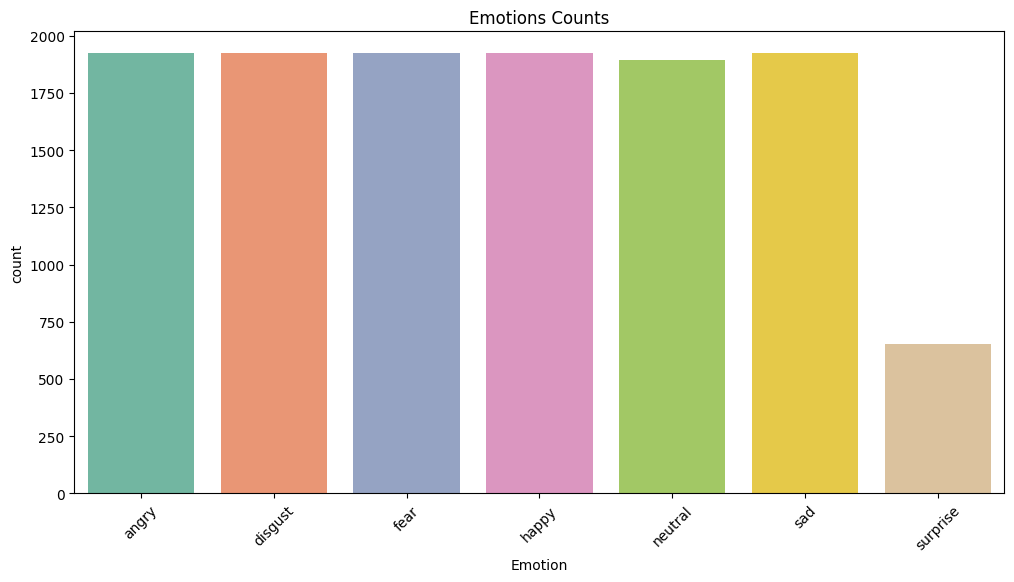

In [26]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [27]:
emotion_names=main_df['Emotion'].unique()

In [28]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [29]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)
    
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

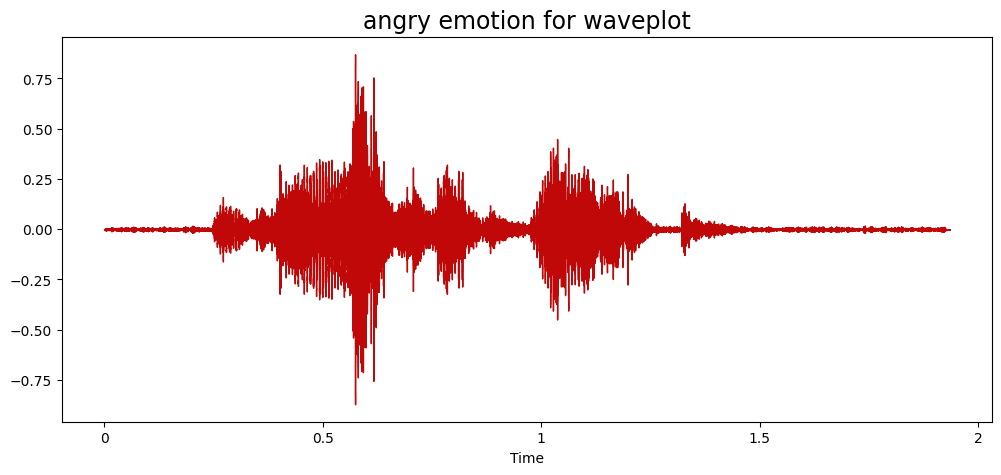

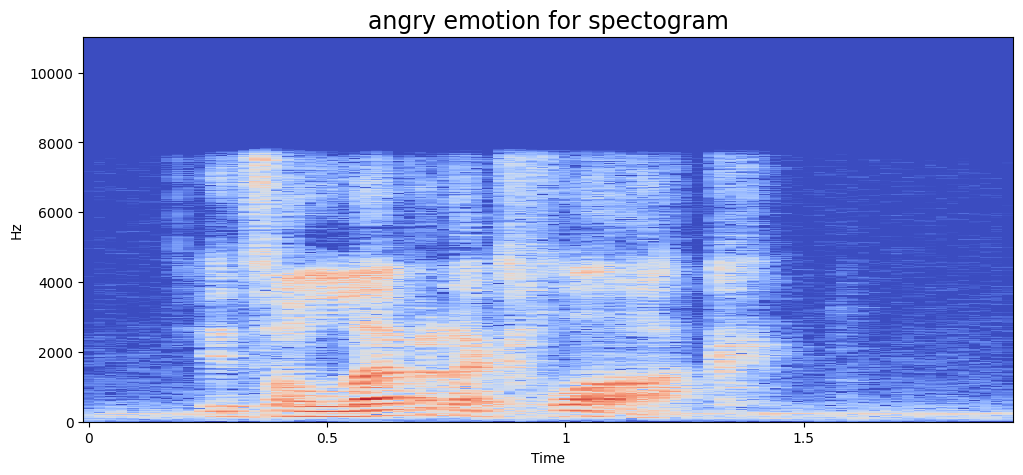

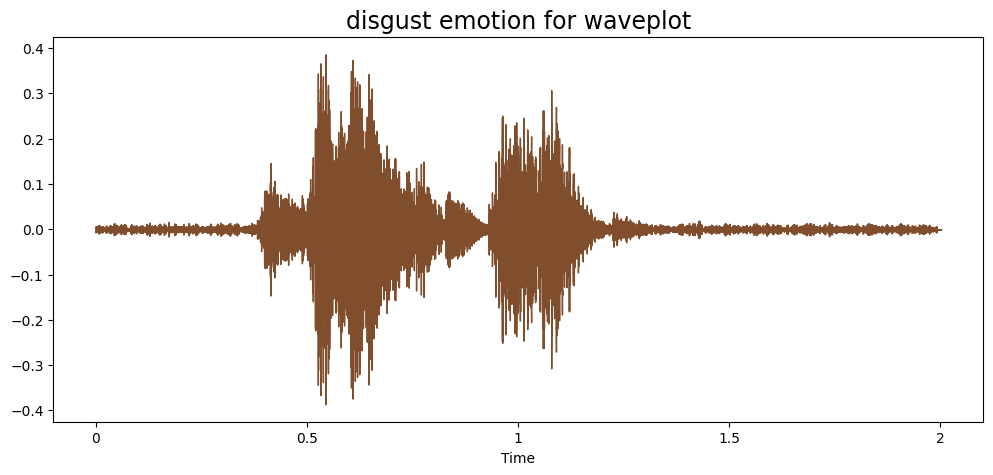

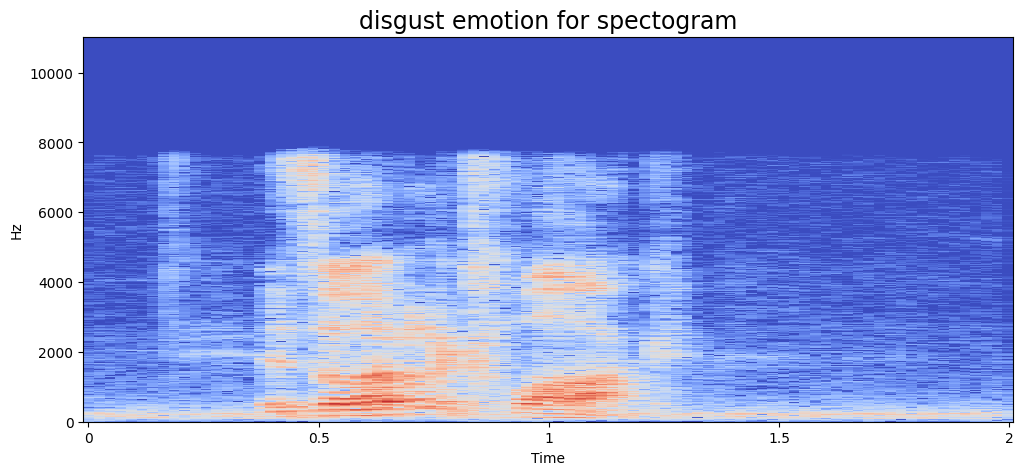

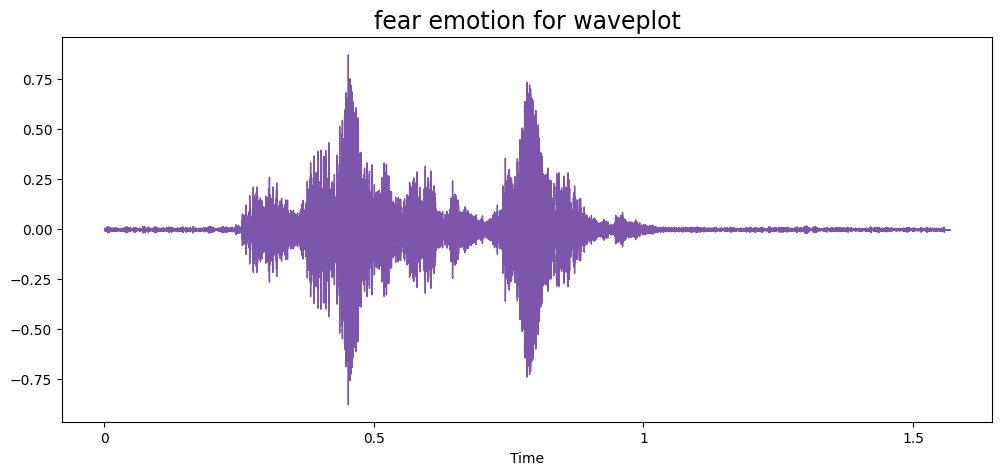

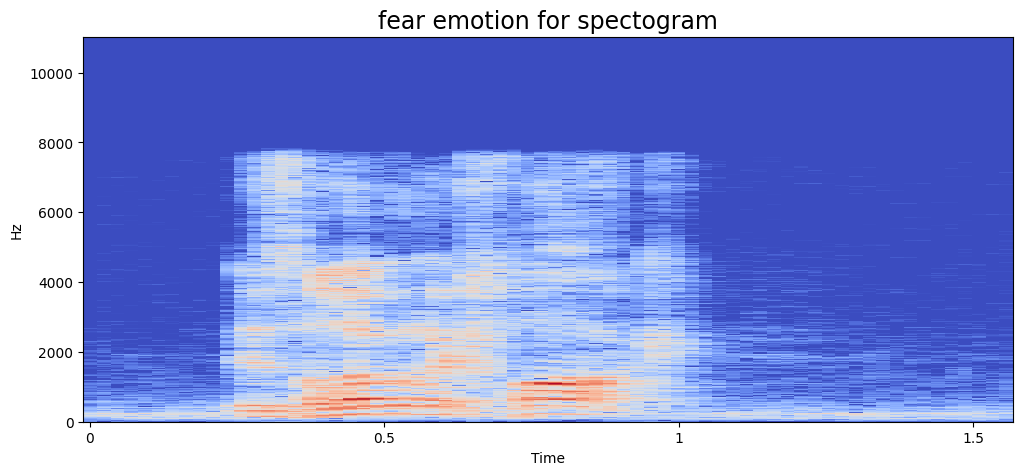

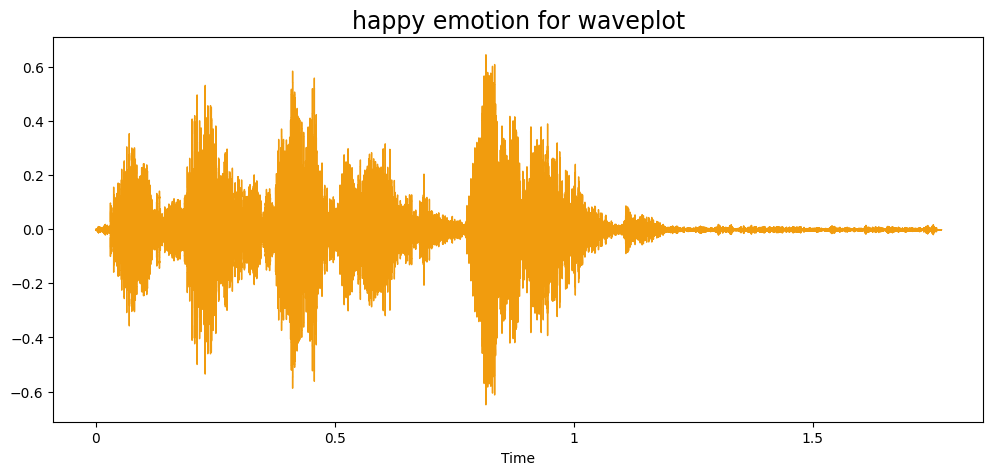

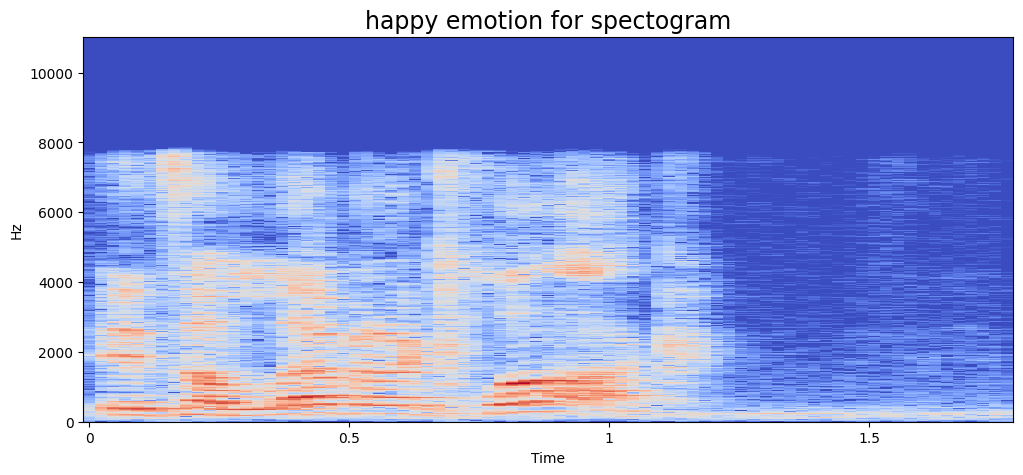

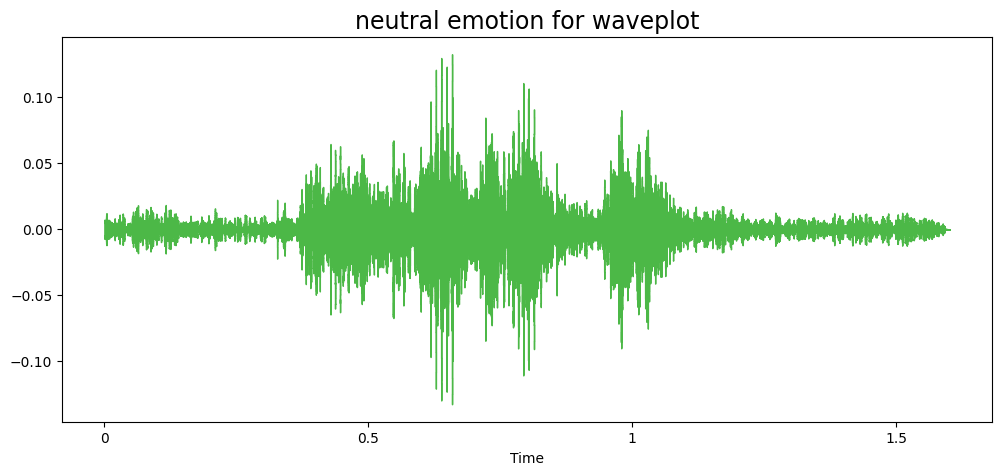

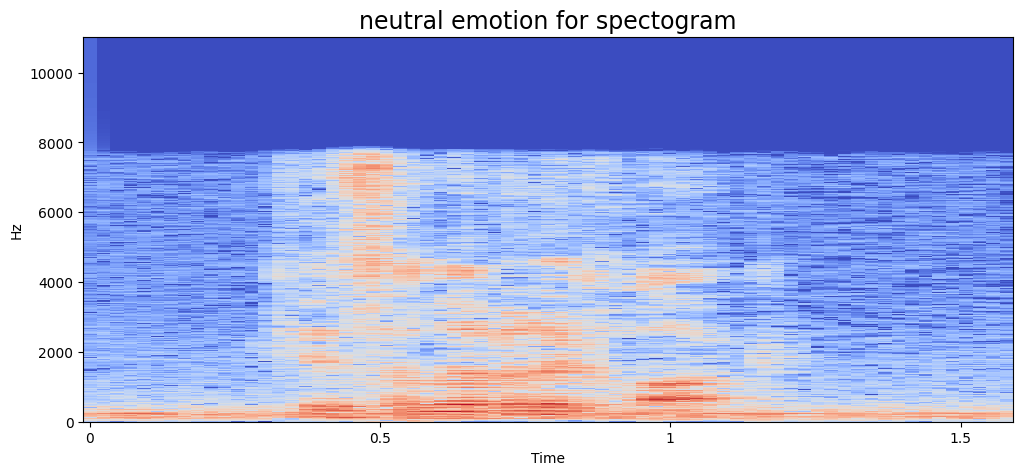

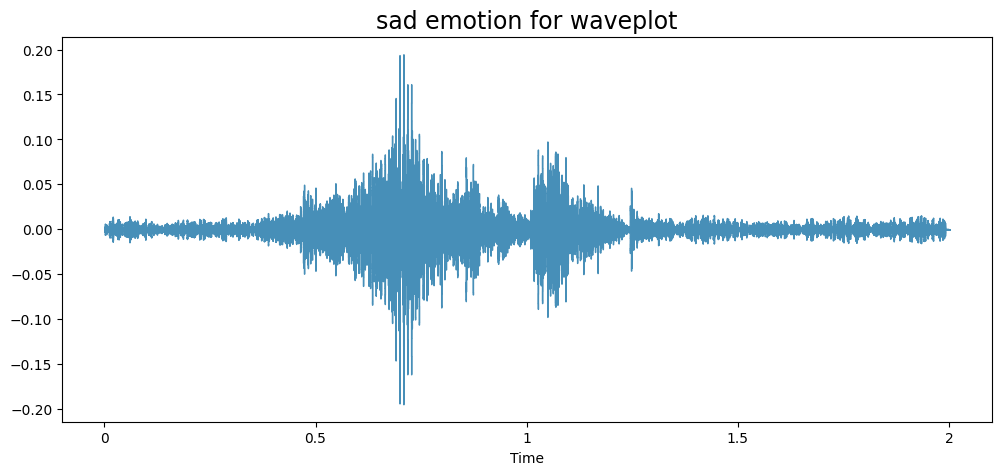

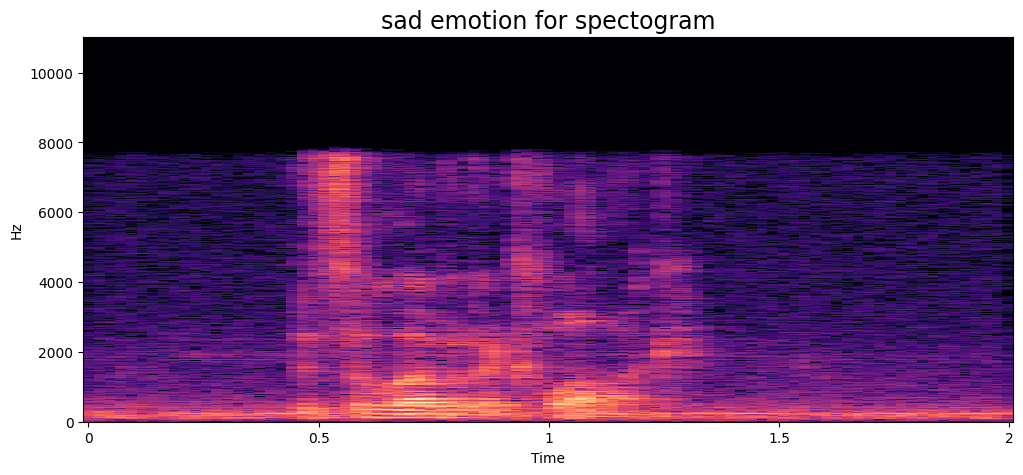

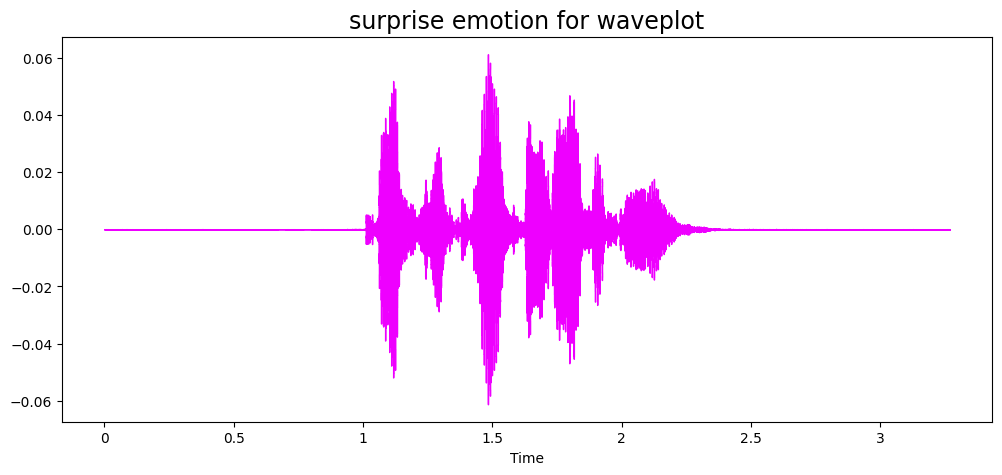

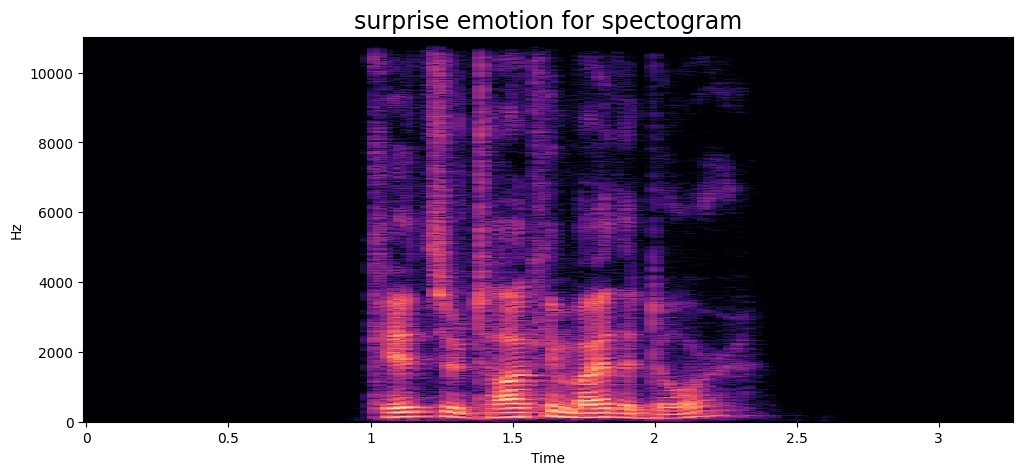

In [30]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [31]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [32]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [33]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [34]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [35]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [36]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [37]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample



In [38]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data,sr,n_steps=0.7,random=False):
    if random:
        n_steps=np.random.random() * n_steps
    return librosa.effects.pitch_shift(y=data,sr=sr,n_steps=n_steps)


def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)
    

In [39]:
data,sr=librosa.load(audio_path[6])

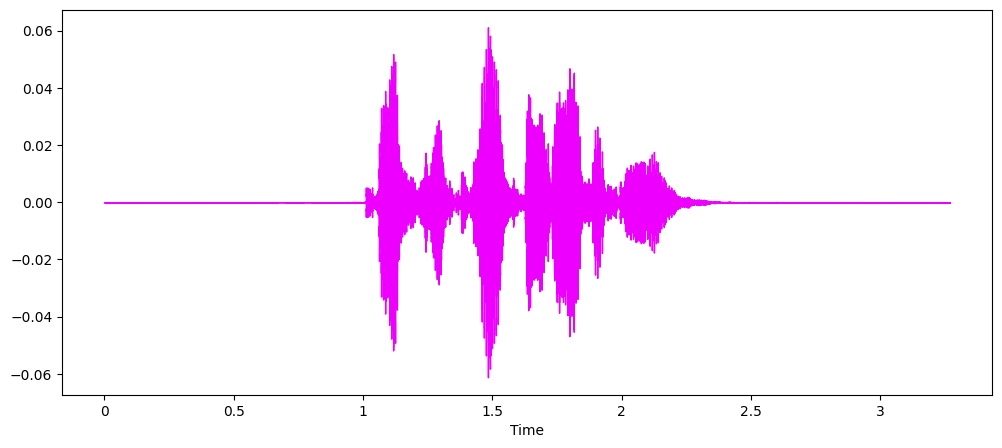

In [40]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,sr=sr,color='#EE00FF')
IPython.display.Audio(audio_path[6])

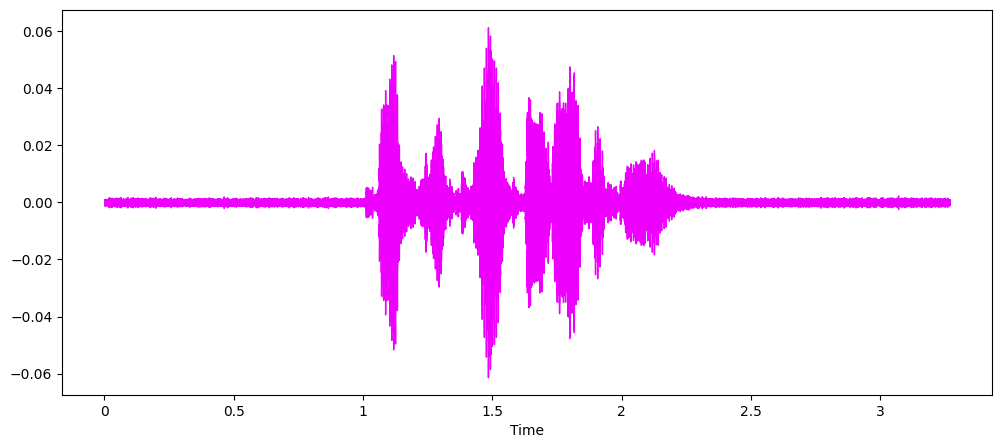

In [41]:
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(noised_audio,rate=sr)

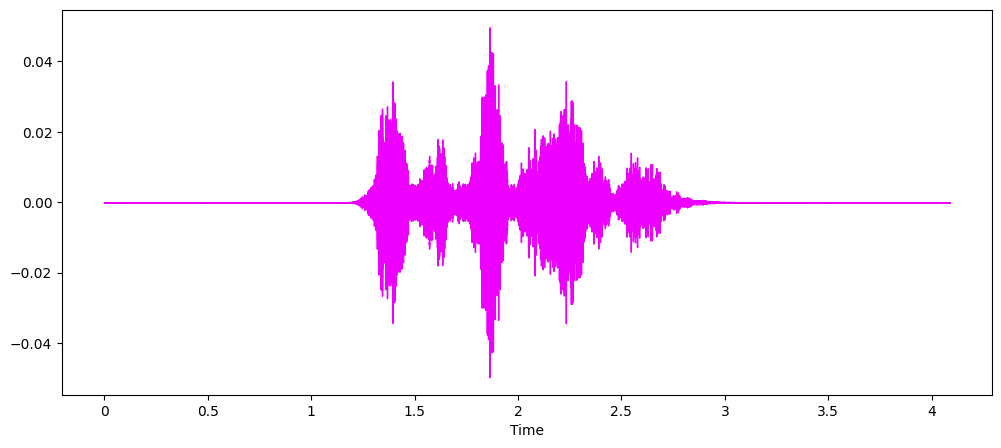

In [42]:
stretched_audio= librosa.effects.time_stretch(data, rate=0.8)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(stretched_audio,rate=sr)

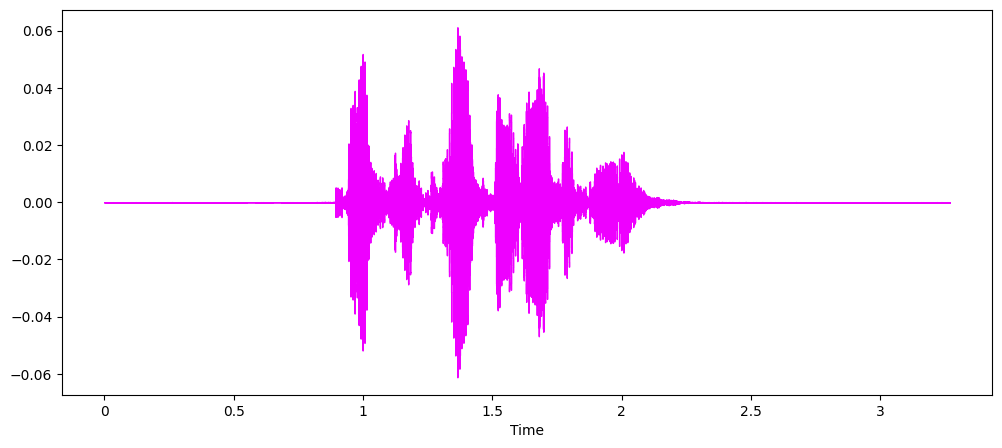

In [43]:
shifted_audio=shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(shifted_audio,rate=sr)

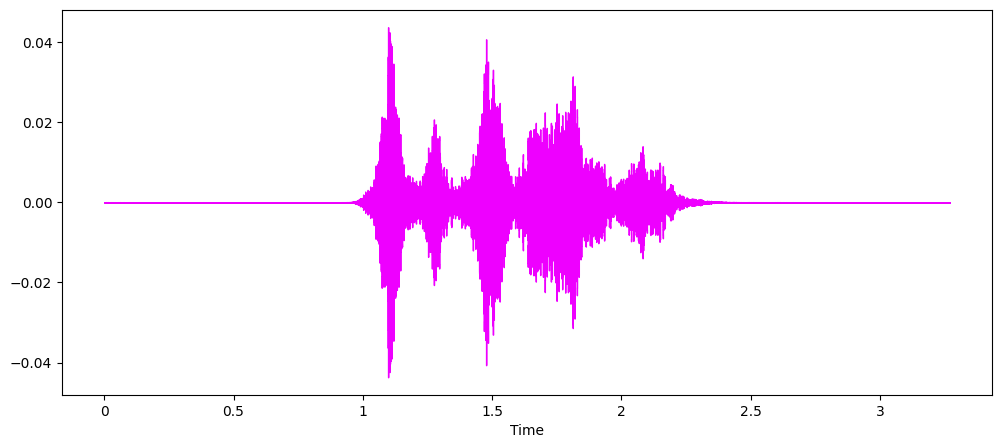

In [44]:
pitched_audio = librosa.effects.pitch_shift(data, sr=sr, n_steps=2.0, bins_per_octave=12)
plt.figure(figsize=(12,5))
librosa.display.waveshow(pitched_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(pitched_audio,rate=sr)

In [45]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length=frame_length, hop_length=hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                       ))
    return result



def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

In [46]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


In [47]:
path

'./Tess/YAF_sad\\YAF_youth_sad.wav'

In [48]:
processed_data_path='./processed_data.csv'

In [49]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.034180,0.069336,0.115723,0.148926,0.142090,0.130859,0.101562,0.070801,0.069336,0.074219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.168945,0.269531,0.393066,0.408691,0.343262,0.279785,0.202637,0.169922,0.229980,0.248047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.038574,0.078125,0.125000,0.138184,0.133789,0.115234,0.084473,0.075684,0.067383,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.090820,0.174805,0.247559,0.251953,0.225098,0.165039,0.118164,0.105957,0.103027,0.108398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.041504,0.059082,0.070312,0.062988,0.080566,0.128906,0.145508,0.146484,0.125977,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
5,0.041504,0.059082,0.070312,0.062012,0.078613,0.127930,0.144531,0.146484,0.126953,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
6,0.039062,0.054199,0.066406,0.058594,0.081543,0.110840,0.127930,0.129883,0.104492,0.076660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
7,0.041504,0.058105,0.071289,0.066895,0.089355,0.118652,0.125977,0.125000,0.103516,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
8,0.052734,0.069336,0.087402,0.068848,0.076660,0.075684,0.077637,0.078613,0.072266,0.084961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
9,0.051758,0.068359,0.088379,0.072754,0.082520,0.085449,0.086426,0.084473,0.079102,0.087891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear


In [50]:
df=pd.read_csv(processed_data_path)
df.shape

(48648, 2377)

In [51]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(48648, 2377)

In [52]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.034180,0.069336,0.115723,0.148926,0.142090,0.130859,0.101562,0.070801,0.069336,0.074219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
1,0.168945,0.269531,0.393066,0.408691,0.343262,0.279785,0.202637,0.169922,0.229980,0.248047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
2,0.038574,0.078125,0.125000,0.138184,0.133789,0.115234,0.084473,0.075684,0.067383,0.072266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
3,0.090820,0.174805,0.247559,0.251953,0.225098,0.165039,0.118164,0.105957,0.103027,0.108398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
4,0.041504,0.059082,0.070312,0.062988,0.080566,0.128906,0.145508,0.146484,0.125977,0.072266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
5,0.041504,0.059082,0.070312,0.062012,0.078613,0.127930,0.144531,0.146484,0.126953,0.072266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
6,0.039062,0.054199,0.066406,0.058594,0.081543,0.110840,0.127930,0.129883,0.104492,0.076660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
7,0.041504,0.058105,0.071289,0.066895,0.089355,0.118652,0.125977,0.125000,0.103516,0.072266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
8,0.052734,0.069336,0.087402,0.068848,0.076660,0.075684,0.077637,0.078613,0.072266,0.084961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
9,0.051758,0.068359,0.088379,0.072754,0.082520,0.085449,0.086426,0.084473,0.079102,0.087891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear


In [53]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [54]:
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
Y = to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38918, 2376), (9730, 2376), (38918, 7), (9730, 7))

In [56]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [57]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [58]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((35026, 2376, 1), (9730, 2376, 1), (3892, 2376, 1))

In [59]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [60]:
EPOCH=50
BATCH_SIZE=64

In [61]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

In [62]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/50
548/548 [==============================] - 69s 110ms/step - loss: 1.3673 - accuracy: 0.4812 - val_loss: 1.4546 - val_accuracy: 0.4504 - lr: 0.0010
Epoch 2/50
548/548 [==============================] - 59s 107ms/step - loss: 1.0856 - accuracy: 0.5791 - val_loss: 1.1509 - val_accuracy: 0.5704 - lr: 0.0010
Epoch 3/50
548/548 [==============================] - 59s 107ms/step - loss: 0.9460 - accuracy: 0.6352 - val_loss: 1.0933 - val_accuracy: 0.5956 - lr: 0.0010
Epoch 4/50
548/548 [==============================] - 59s 107ms/step - loss: 0.8213 - accuracy: 0.6864 - val_loss: 0.9884 - val_accuracy: 0.6254 - lr: 0.0010
Epoch 5/50
548/548 [==============================] - 59s 107ms/step - loss: 0.6736 - accuracy: 0.7484 - val_loss: 0.8305 - val_accuracy: 0.6948 - lr: 0.0010
Epoch 6/50
548/548 [==============================] - 59s 107ms/step - loss: 0.5193 - accuracy: 0.8116 - val_loss: 0.8378 - val_accuracy: 0.7014 - lr: 0.0010
Epoch 7/50
548/548 [==============================] 

In [86]:
#!pip install --upgrade nbformat
#!pip install ipykernel

In [90]:
# Extract accuracy and validation accuracy data
accuracy_data = history.history['accuracy']
val_accuracy_data = history.history['val_accuracy']

# Pair each accuracy value with its corresponding epoch
accuracy_pairs = list(enumerate(accuracy_data, start=1))
val_accuracy_pairs = list(enumerate(val_accuracy_data, start=1))

# Print the data
print("Accuracy data per epoch:")
for epoch, accuracy in accuracy_pairs:
    print(f"Epoch {epoch}: {accuracy}")

print("\nValidation accuracy data per epoch:")
for epoch, accuracy in val_accuracy_pairs:
    print(f"Epoch {epoch}: {accuracy}")

Accuracy data per epoch:
Epoch 1: 0.4811854064464569
Epoch 2: 0.5790555477142334
Epoch 3: 0.6351567506790161
Epoch 4: 0.6864044070243835
Epoch 5: 0.7483869194984436
Epoch 6: 0.8115971088409424
Epoch 7: 0.8710101246833801
Epoch 8: 0.9144920706748962
Epoch 9: 0.9511505961418152
Epoch 10: 0.9580026268959045
Epoch 11: 0.9691942930221558
Epoch 12: 0.97267746925354
Epoch 13: 0.9830697178840637
Epoch 14: 0.9788157343864441
Epoch 15: 0.979986310005188
Epoch 16: 0.9848969578742981
Epoch 17: 0.981499433517456
Epoch 18: 0.9836978316307068
Epoch 19: 0.9833837747573853
Epoch 20: 0.989636242389679
Epoch 21: 0.979643702507019
Epoch 22: 0.9898646473884583
Epoch 23: 0.9945468902587891
Epoch 24: 0.986609935760498
Epoch 25: 0.9855250120162964
Epoch 26: 0.9921486973762512
Epoch 27: 0.9940329790115356
Epoch 28: 0.9901787042617798
Epoch 29: 0.9900359511375427
Epoch 30: 0.9913492798805237
Epoch 31: 0.9914634823799133
Epoch 32: 0.9910637736320496
Epoch 33: 0.9949180483818054
Epoch 34: 0.9955747127532959
Epoch

In [89]:
# Extract loss and validation loss data
loss_data = history.history['loss']
val_loss_data = history.history['val_loss']

# Pair each loss value with its corresponding epoch
loss_pairs = list(enumerate(loss_data, start=1))
val_loss_pairs = list(enumerate(val_loss_data, start=1))

# Print the data
print("Loss data per epoch:")
for epoch, loss in loss_pairs:
    print(f"Epoch {epoch}: {loss}")

print("\nValidation loss data per epoch:")
for epoch, loss in val_loss_pairs:
    print(f"Epoch {epoch}: {loss}")

Loss data per epoch:
Epoch 1: 1.3673228025436401
Epoch 2: 1.0856026411056519
Epoch 3: 0.9459608197212219
Epoch 4: 0.8212652802467346
Epoch 5: 0.6735939383506775
Epoch 6: 0.5193089246749878
Epoch 7: 0.3597046732902527
Epoch 8: 0.25030314922332764
Epoch 9: 0.15091067552566528
Epoch 10: 0.12726695835590363
Epoch 11: 0.09341928362846375
Epoch 12: 0.0839211568236351
Epoch 13: 0.054531022906303406
Epoch 14: 0.06488770991563797
Epoch 15: 0.061782851815223694
Epoch 16: 0.05007041245698929
Epoch 17: 0.05502874776721001
Epoch 18: 0.05026628077030182
Epoch 19: 0.05011235550045967
Epoch 20: 0.03293600678443909
Epoch 21: 0.06177961453795433
Epoch 22: 0.03318477049469948
Epoch 23: 0.0183922927826643
Epoch 24: 0.04073821380734444
Epoch 25: 0.043146371841430664
Epoch 26: 0.02544509619474411
Epoch 27: 0.020698893815279007
Epoch 28: 0.029656948521733284
Epoch 29: 0.031181907281279564
Epoch 30: 0.02598024345934391
Epoch 31: 0.02566576562821865
Epoch 32: 0.02666722983121872
Epoch 33: 0.01746666431427002
E

In [83]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

305/305 [==============================] - 12s 41ms/step


array([0, 5, 2, ..., 4, 4, 5], dtype=int64)

In [71]:
y_check=np.argmax(y_test,axis=1)
y_check

array([0, 5, 2, ..., 4, 4, 5], dtype=int64)

In [72]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.2442740648984909
Test Accuracy: 0.9480986595153809


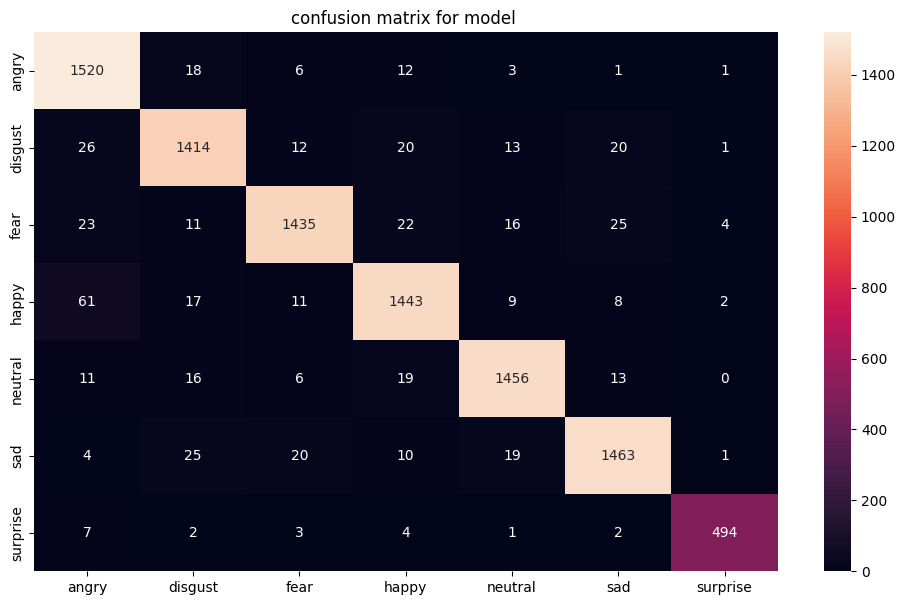

In [73]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [74]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

       angry       0.92      0.97      0.95      1561
     disgust       0.94      0.94      0.94      1506
        fear       0.96      0.93      0.95      1536
       happy       0.94      0.93      0.94      1551
     neutral       0.96      0.96      0.96      1521
         sad       0.95      0.95      0.95      1542
    surprise       0.98      0.96      0.97       513

    accuracy                           0.95      9730
   macro avg       0.95      0.95      0.95      9730
weighted avg       0.95      0.95      0.95      9730



In [75]:
model_path = "./res_model.h5"

model.save(model_path)